In [1]:
# this was installed using 
# "pip install -e pypothole" where pypothole was checked out from github

# the -e means we can edit and update it and it is installed as a symlink from site_packages

import pypothole.parse3ddmp


In [2]:
# apply survex app dump3d to a 3d file and load the output
# (We can put survex as a dependency for this library)
import os
fname = "/home/julian/data/expodata/loser/caves/258/hydra/hydra.3d"
dstream = os.popen("dump3d -d %s" % fname)

In [3]:
lines = dstream.readlines()

In [5]:
# run the parser on this file
dmp3d = pypothole.parse3ddmp.DMP3d(lines)

In [6]:
# read and filter out the components of the cave
leglines = [line  for line in dmp3d.lines  if line[0] != line[1] and "SURFACE" not in line[4]]
xsects = [xsect  for xsect in dmp3d.xsects  if len(xsect) >= 2]


In [19]:
print(len(leglines))
print(leglines[0])

548
(P3(-438.22, 35.65, -245.89), P3(-432.86, 31.01, -242.85), 'biglad', 'NORMAL', [], datetime.datetime(2017, 7, 21, 0, 0))


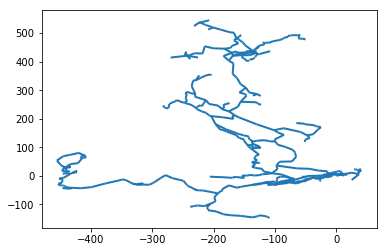

In [35]:
# plot the centrelines as is
import matplotlib.pyplot as plt
import matplotlib.collections as mc
%matplotlib inline

lc = mc.LineCollection([[l[0][:2], l[1][:2]]  for l in leglines], linewidths=2)
fig, ax = plt.subplots()
ax.add_collection(lc)
ax.autoscale()


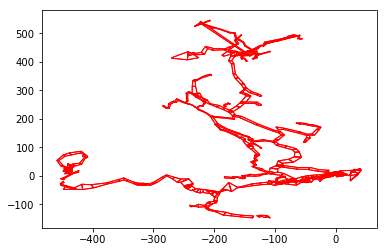

In [39]:
# the cross sections come as series can be converted into a polyhedron
# (which could be plotted in 3D if we wanted too)
fig, ax = plt.subplots()

for xsect in xsects:
    quads, xcs = dmp3d.GetXSectionQuadHedronP(xsect)
    lc = mc.LineCollection([[p[:2]  for p in quad]  for quad in quads], 
                           linewidths=1, color="r")
    ax.add_collection(lc)
ax.autoscale()
